# PCA on Massive Datasets

In this example we will show using CoLA to perform PCA on a massive dataset.

In [13]:
import time
import torch
import cola
#from cola.linear_algebra import lazify
# from cola.algorithms.svd import get_randomized_svd

N, D = 100000, 300
dtype = torch.float32
data = torch.randn(N, D, dtype=dtype)
print(f"Dataset (N={data.shape[0]:,d} | D={data.shape[1]:,d})")

k = 50
X = cola.lazify(data)

Dataset (N=100,000 | D=300)


In [31]:
U,S,Vh= cola.svd(X, rank=300)

tensor(0.8943) tensor(1.1139)


In [21]:
U2 = (X@Vh.H)/S

In [22]:
torch.linalg.norm(U-U2)

tensor(0.)

In [23]:
print(U.shape,S.shape,Vh.shape,X.shape)

torch.Size([100000, 300]) torch.Size([300]) torch.Size([300, 300]) torch.Size([100000, 300])


In [24]:
diff  = cola.lazify(U)@cola.diag(S)@cola.lazify(Vh) - X

In [25]:
torch.linalg.norm(diff.to_dense())/torch.linalg.norm(X.to_dense())

tensor(1.2632e-06)

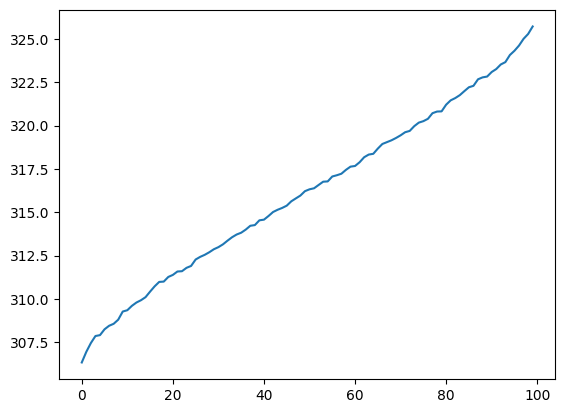

In [8]:
import matplotlib.pyplot as plt
plt.plot(S)

$X X^{T}$